In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import sys

In [2]:
from scipy.misc import electrocardiogram # test signal

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_20636\134395754.py:1: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  plt.plot(electrocardiogram()[0:1000])


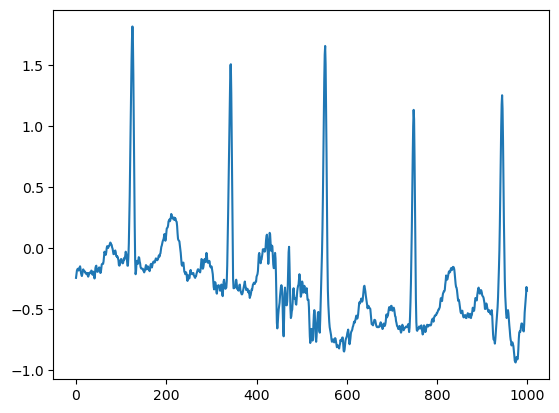

In [3]:
plt.plot(electrocardiogram()[0:1000])

## TODO:
* delete useless column in uploaded CSV files
* load data from google drive
* test perfomance of data loading (from google drive)
* convert samples into sec and fixed it on X axis
* 

In [4]:
data_folder= 'CSV_DATA/'

In [5]:
all_files = os.listdir(data_folder)
all_files

['Polar_H10_700ADF2B_20220717_100946_HR.txt',
 'Polar_H10_700ADF2B_20220717_100946_RR.txt',
 'Polar_H10_700ADF2B_20220717_100947_ECG.txt',
 'Polar_H10_700ADF2B_20220717_101000_ACC.txt']

In [6]:
for i in all_files:
    if 'RR' in i:
        rr_file = i
    elif 'HR' in i:
        hr_file = i
    elif 'ECG' in i:
        ecg_file = i
    elif 'ACC' in i:
        acc_file =i

In [7]:
ecg_data = pd.read_csv(data_folder + ecg_file, header=0, sep=';')

In [8]:
ecg_data.head()

,Phone timestamp,sensor timestamp [ns],timestamp [ms],ecg [uV]
0,2022-07-17T10:09:50.067,599616359864727820,0.000000,5405
1,2022-07-17T10:09:50.074,599616359872399682,7.671862,5397
2,2022-07-17T10:09:50.082,599616359880071544,15.343724,5351
3,2022-07-17T10:09:50.090,599616359887743406,23.015587,5255
4,2022-07-17T10:09:50.097,599616359895415268,30.687449,5172


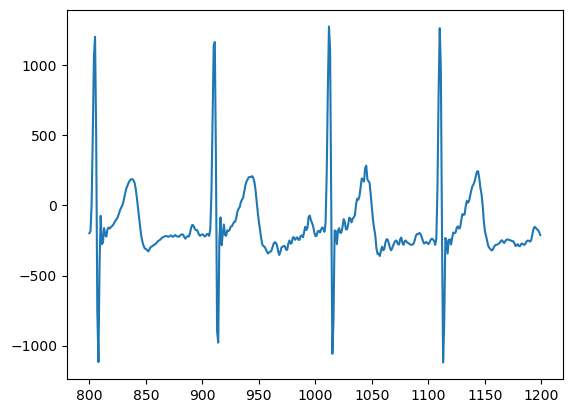

In [9]:
plt.plot(ecg_data['ecg [uV]'][800:1200])

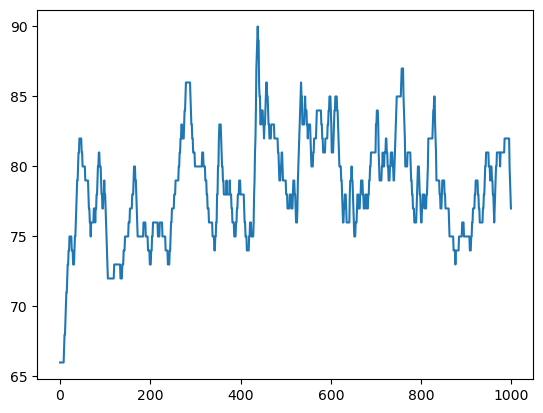

In [10]:
hr_data = pd.read_csv(data_folder + hr_file, header=0, sep=';')
hr_data.head()
plt.plot(hr_data['HR [bpm]'][:1000])

In [11]:
ecg_data['ecg [uV]'].median()

-178.0

In [12]:
len(ecg_data)

1198076

In [13]:
def plot_f(index):
    plt.plot(ecg_data['ecg [uV]'][index:index+200]);
    
index=widgets.IntSlider(min=0, max=len(ecg_data), step=200, value=0)
interact(plot_f, index=index);

interactive(children=(IntSlider(value=0, description='index', max=1198076, step=200), Output()), _dom_classes=…

In [14]:
acc_data = pd.read_csv(data_folder + acc_file, header=0, sep=';')
acc_data.head()

,Phone timestamp,sensor timestamp [ns],X [mg],Y [mg],Z [mg]
0,2022-07-17T10:10:01.426,599616371626542134,-946,118,206
1,2022-07-17T10:10:01.435,599616371636496936,-946,118,228
2,2022-07-17T10:10:01.445,599616371646451738,-952,117,218
3,2022-07-17T10:10:01.455,599616371656406540,-963,119,205
4,2022-07-17T10:10:01.465,599616371666361342,-956,115,217


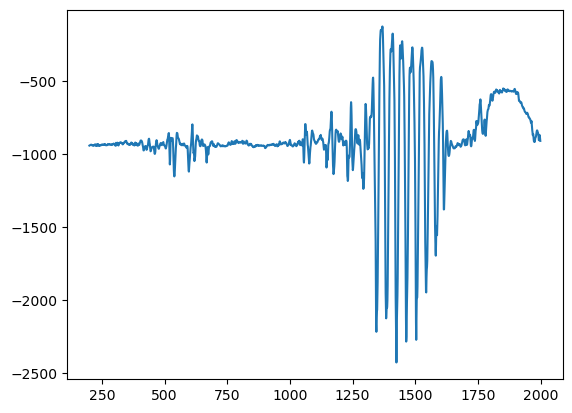

In [15]:
plt.plot(acc_data['X [mg]'][200:2000])

In [16]:
diff_ns = acc_data['sensor timestamp [ns]'].diff()
diff_ns

0               NaN
1         9954802.0
2         9954802.0
3         9954802.0
4         9954802.0
            ...    
921163    9975995.0
921164    9975995.0
921165    9975995.0
921166    9975995.0
921167    9975995.0
Name: sensor timestamp [ns], Length: 921168, dtype: float64

In [17]:
diff_us = diff_ns/1000
diff_us

0              NaN
1         9954.802
2         9954.802
3         9954.802
4         9954.802
            ...   
921163    9975.995
921164    9975.995
921165    9975.995
921166    9975.995
921167    9975.995
Name: sensor timestamp [ns], Length: 921168, dtype: float64

In [18]:
diff_ms = diff_us/1000
diff_ms

0              NaN
1         9.954802
2         9.954802
3         9.954802
4         9.954802
            ...   
921163    9.975995
921164    9.975995
921165    9.975995
921166    9.975995
921167    9.975995
Name: sensor timestamp [ns], Length: 921168, dtype: float64

In [19]:
diff_ecg_ns = ecg_data['sensor timestamp [ns]'].diff()
diff_ecg_ns

0                NaN
1          7671862.0
2          7671862.0
3          7671862.0
4          7671862.0
             ...    
1198071    7675277.0
1198072    7675277.0
1198073    7675277.0
1198074    7675277.0
1198075    7675277.0
Name: sensor timestamp [ns], Length: 1198076, dtype: float64

In [20]:
diff_ecg_ns/1000000

0               NaN
1          7.671862
2          7.671862
3          7.671862
4          7.671862
             ...   
1198071    7.675277
1198072    7.675277
1198073    7.675277
1198074    7.675277
1198075    7.675277
Name: sensor timestamp [ns], Length: 1198076, dtype: float64

In [21]:
1/7.67

0.1303780964797914

In [22]:
sys.getsizeof(ecg_data)/sys.getsizeof(diff_ecg_ns)

12.999819713645174

In [23]:
sys.getsizeof(ecg_data)

124600048

In [24]:
sys.getsizeof(diff_ecg_ns)

9584752